In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
log_url = "https://beam-outputs.s3.amazonaws.com/output/sfbay/gemini-scenario-8-MaxEV-10p__2023-01-05_22-06-55_zdn/cpu_ram_usage.csv.gz"
cpu_ram_log = pd.read_csv(log_url)
print(cpu_ram_log.shape)

cpu_ram_log['date_time'] =  cpu_ram_log.apply(lambda r: f"{r['date'].strip()} {r['time'].strip()}", axis=1)
cpu_ram_log['dateTime'] = pd.to_datetime(cpu_ram_log['date_time'], format="%Y-%m-%d %H:%M:%S")

cpu_ram_log.head()

(360, 5)


,date,time,CPU usage,RAM used,RAM available,date_time,dateTime
0,2023-01-05,21:59:59,1,1,742,2023-01-05 21:59:59,2023-01-05 21:59:59
1,2023-01-05,22:00:21,1,1,742,2023-01-05 22:00:21,2023-01-05 22:00:21
2,2023-01-05,22:00:43,1,1,742,2023-01-05 22:00:43,2023-01-05 22:00:43
3,2023-01-05,22:01:05,1,1,742,2023-01-05 22:01:05,2023-01-05 22:01:05
4,2023-01-05,22:01:27,1,1,742,2023-01-05 22:01:27,2023-01-05 22:01:27


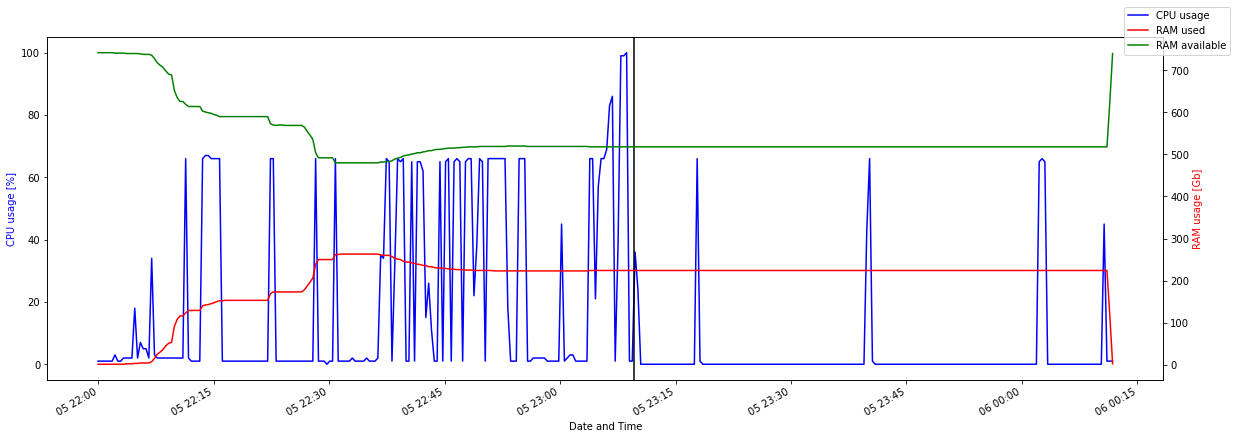

In [3]:
fig, ax1 = plt.subplots(figsize=(20,7))

ax1.set_ylabel('CPU usage [%]', color='blue')
cpu_ram_log.plot(x="dateTime", y="CPU usage", label="CPU usage", color='blue', ax=ax1)

ax2 = ax1.twinx()
cpu_ram_log.plot(x="dateTime", y="RAM used", label="RAM used", color='red', ax=ax2)
cpu_ram_log.plot(x="dateTime", y="RAM available", label="RAM available", color='green', ax=ax2)

ax1.set_xlabel('Date and Time')
ax2.set_ylabel('RAM usage [Gb]', color='red')

ax1.legend().remove()
ax2.legend().remove()

ax1.axvline(pd.to_datetime('2023-01-05 23:09:39', format="%Y-%m-%d %H:%M:%S"), color='black')

fig.legend(loc="upper right", bbox_to_anchor=(0.95,0.95))

pass